<a href="https://colab.research.google.com/github/astrovishalthakur/DeepLearning/blob/main/ANN/ANN_with_BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [3]:
tf.keras.__version__

'2.8.0'

##### To see if <b>GPU</b> is available or not

In [4]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple classifier using keras's Sequential API

### Dataset MNIST

1. Its dataset of handwritten digits
2. each data point is 2d array of 28x28 size
3. it has 10 classes 0-9
4. aka hello world of tf

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [6]:
# import os
# ROOT = "/content/drive/MyDrive/Ineuron_ANN_Keras_MNIST"
# os.chdir(ROOT)

In [7]:
# os.listdir()

In [8]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = f_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Label-->Description
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [9]:
X_train.shape, X_train.dtype

((60000, 28, 28), dtype('uint8'))

In [10]:
X_test.shape, y_test.shape, y_test.dtype

((10000, 28, 28), (10000,), dtype('uint8'))

In [11]:
X_valid , X_train_ = X_train[: 5000] / 255, X_train[5000:] / 255
y_valid, y_train_ = y_train[:5000], y_train[5000:] 

In [12]:
X_test = X_test/255

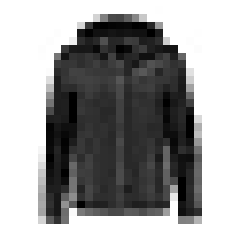

4

In [13]:
plt.imshow(X_train[5000], cmap="binary")
plt.axis("off")
plt.show()
y_train[5000]

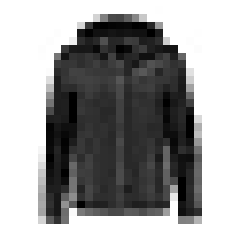

4

In [14]:
plt.imshow(X_train_[0], cmap="binary")
plt.axis("off")
plt.show()
y_train_[0]

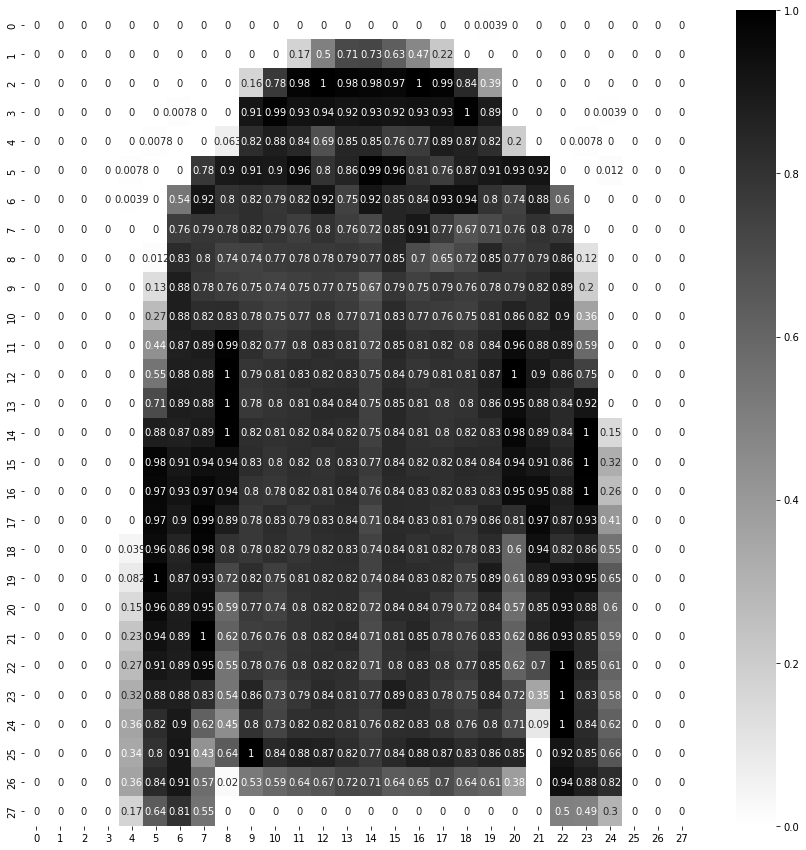

In [15]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(X_train_[0], annot=True, cmap="binary")

Sequential layer in keras means every layer is connected to next one, no layer is skipped

skipping layer is called skip correction


Defining list of layers

In [16]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="output")
]

In [17]:
model = tf.keras.models.Sequential(LAYERS)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


###### How Params are calculated

In [19]:
784*300 + 300

235500

In [20]:
300*100 + 100

30100

In [21]:
100*10 + 10

1010

##### It's shown that non trainable weights are 0. Its because we haven't frozen any weights. We freeze weights during transfer learning.

In [22]:
model.layers

In [23]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name)

###### Weights and biases

In [24]:
hidden1.get_weights()

[array([[-0.02260934,  0.04242638, -0.06602024, ..., -0.06287984,
          0.07090192,  0.0565336 ],
        [ 0.0421014 ,  0.04389626,  0.00261211, ..., -0.0169576 ,
         -0.01267068,  0.00941166],
        [ 0.00738327, -0.07067903,  0.04520135, ..., -0.03216907,
          0.06240246,  0.05858389],
        ...,
        [-0.013988  ,  0.03975924,  0.02703558, ...,  0.04866478,
         -0.02402108, -0.04286654],
        [-0.03635105,  0.05659504, -0.06679709, ...,  0.06162223,
         -0.06065278, -0.0106861 ],
        [-0.04704237,  0.05517708,  0.00270041, ...,  0.02079501,
          0.03161907, -0.01473404]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
weights.shape, biases.shape

((784, 300), (300,))

*loss_function(actual, pred) = error*

In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

we are using <b> Sparse categorical cross entropy</b> as loss function.
There is another loss function called categorical cross entropy.
We are using first one because we don't need to one hot encode our labels which are in the form 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

In <b>categorical cross entropy</b>, we need to one hot encode the labels as well.

In [28]:
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [29]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train_, y_train_,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7038 - accuracy: 0.7684 - val_loss: 0.4918 - val_accuracy: 0.8374
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4876 - accuracy: 0.8307 - val_loss: 0.4341 - val_accuracy: 0.8538
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4429 - accuracy: 0.8454 - val_loss: 0.4108 - val_accuracy: 0.8592
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4162 - accuracy: 0.8533 - val_loss: 0.4092 - val_accuracy: 0.8604
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3966 - accuracy: 0.8610 - val_loss: 0.4407 - val_accuracy: 0.8508


In above output, 1719 is no. of batches.

no. of batch = total points / no. of points in one batch

total point in x_train = 55000<br>
batch size = 32


In [30]:
print("no. of batches = ", 55000/32)

no. of batches =  1718.75


In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.8299


[0.48331260681152344, 0.8299000263214111]

# Saving model

In [32]:
# model.save("model.h5")

.h5 is extension to save keras model

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.703763,0.768400,0.491776,0.8374
1,0.487619,0.830709,0.434085,0.8538
2,0.442854,0.845382,0.410820,0.8592
3,0.416166,0.853327,0.409173,0.8604
4,0.396640,0.861000,0.440657,0.8508


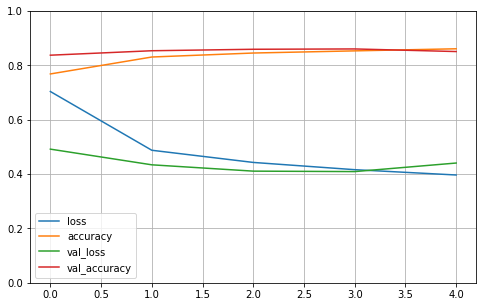

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

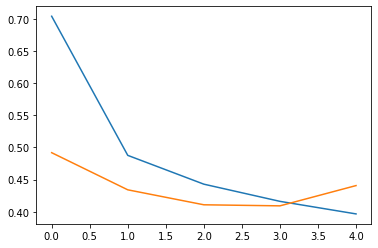

In [35]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [36]:
X_new = X_test[:3]
y_new = y_test[:3]
y_prob = model.predict(X_new)
y_prob

array([[3.0870964e-05, 5.7277894e-06, 4.4448210e-05, 4.0747731e-05,
        8.3150690e-06, 6.5086223e-02, 1.2013922e-04, 1.4494170e-01,
        8.3260881e-03, 7.8139573e-01],
       [3.4939429e-05, 5.0281591e-07, 9.9612939e-01, 2.2279133e-05,
        1.9493754e-03, 7.2891018e-09, 1.8588826e-03, 1.6684618e-10,
        4.5690858e-06, 7.2386155e-09],
       [3.0691896e-05, 9.9976152e-01, 2.3549310e-05, 1.5631736e-04,
        2.3819561e-05, 3.0262790e-08, 9.4218031e-08, 5.1288833e-07,
        3.3485367e-06, 8.4962203e-08]], dtype=float32)

In [37]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.14, 0.01, 0.78],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

argmax gives index of highest argument

In [38]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred, y_new

(array([9, 2, 1]), array([9, 2, 1], dtype=uint8))

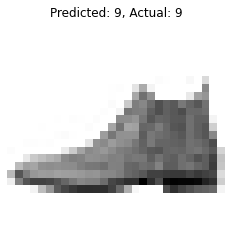

------------------------------------------------------------


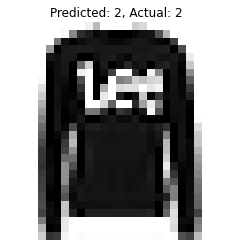

------------------------------------------------------------


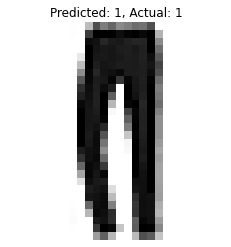

------------------------------------------------------------


In [39]:
for data, pred, actual in zip(X_new, y_pred, y_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print("---"*20)

# BN Approach One

In [40]:
del model

In [41]:
LAYERS_BN_ONE = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="output")
]

In [42]:
model = tf.keras.models.Sequential(LAYERS_BN_ONE)

In [43]:
model.layers

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [45]:
784 * 4, 300 * 4, 100 * 4

(3136, 1200, 400)

In [46]:
parameter_bn = sum((3136, 1200, 400))
parameter_bn

4736

In [47]:
non_trainable = parameter_bn/2
non_trainable

2368.0

## It's just like what we studied.

### New parameters introduced due to Batch Normalization = $$β, γ, μ, σ$$

### out of the 4, only $$β, γ$$ are trainable.

In [48]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

In [49]:
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [50]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train_, y_train_,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 11s 5ms/step - loss: 0.5315 - accuracy: 0.8146 - val_loss: 0.3810 - val_accuracy: 0.8678
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3927 - accuracy: 0.8584 - val_loss: 0.3519 - val_accuracy: 0.8770
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3508 - accuracy: 0.8738 - val_loss: 0.3289 - val_accuracy: 0.8818
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3287 - accuracy: 0.8804 - val_loss: 0.3182 - val_accuracy: 0.8830
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3082 - accuracy: 0.8875 - val_loss: 0.3182 - val_accuracy: 0.8842


In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8719


[0.35030674934387207, 0.8719000220298767]

In [52]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.531451,0.814618,0.380962,0.8678
1,0.392691,0.858400,0.351929,0.8770
2,0.350810,0.873800,0.328941,0.8818
3,0.328698,0.880400,0.318211,0.8830
4,0.308165,0.887473,0.318193,0.8842


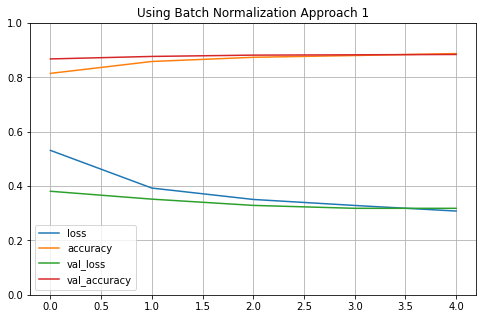

In [53]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Using Batch Normalization Approach 1")
plt.show()

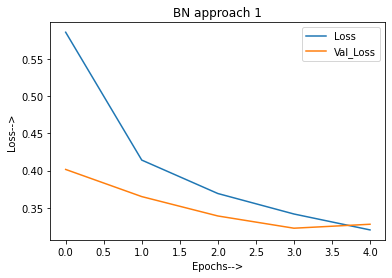

In [74]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")
plt.title("BN approach 1")
plt.xlabel("Epochs-->")
plt.ylabel("Loss-->")
plt.legend()

# Batch Normalization Approach 2

In [56]:
del model

In [57]:
LAYERS_BN_TWO = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(100, name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.Dense(10, activation="softmax", name="output")
]

In [58]:
model = tf.keras.models.Sequential(LAYERS_BN_TWO)

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 hiddenLayer2 (Dense)        (None, 100)              

In [60]:
model.layers

In [62]:
for variable in model.layers[1].variables:
    print(variable.name, variable.trainable)

batch_normalization_3/gamma:0 True
batch_normalization_3/beta:0 True
batch_normalization_3/moving_mean:0 False
batch_normalization_3/moving_variance:0 False


In [63]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

In [65]:
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [66]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train_, y_train_,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5864 - accuracy: 0.8037 - val_loss: 0.4016 - val_accuracy: 0.8592
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4142 - accuracy: 0.8552 - val_loss: 0.3650 - val_accuracy: 0.8722
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3692 - accuracy: 0.8690 - val_loss: 0.3389 - val_accuracy: 0.8806
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3416 - accuracy: 0.8784 - val_loss: 0.3224 - val_accuracy: 0.8822
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3201 - accuracy: 0.8855 - val_loss: 0.3278 - val_accuracy: 0.8842


In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3572 - accuracy: 0.8727


[0.35717663168907166, 0.8726999759674072]

In [68]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.586386,0.803727,0.401587,0.8592
1,0.414182,0.855164,0.365008,0.8722
2,0.369153,0.869000,0.338916,0.8806
3,0.341568,0.878364,0.322429,0.8822
4,0.320127,0.885491,0.327756,0.8842


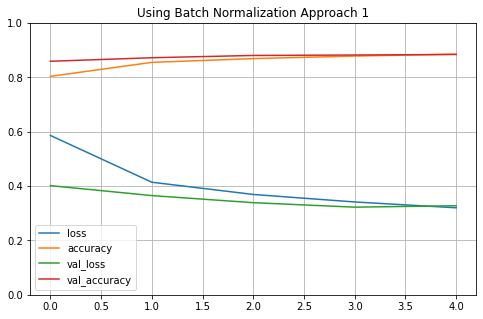

In [69]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Using Batch Normalization Approach 1")
plt.show()

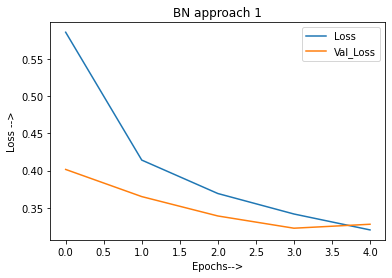

In [73]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")
plt.title("BN approach 1")
plt.xlabel("Epochs-->")
plt.ylabel("Loss -->")
plt.legend()